<a href="https://colab.research.google.com/github/SHAN-6/Naan-Mudhalvan-p2/blob/main/Phase_3_CSV_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ML Model
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
# Read the dataset
df = pd.read_csv('sample_traffic_accidents.csv', sep=';')


In [ ]:
# Display first few rows
df.head()


,"Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity"
0,"2023-01-01,16:50,Madurai,Rainy,Rural,5,0,1"
1,"2023-01-02,07:50,Coimbatore,Foggy,Urban,1,0,3"
2,"2023-01-03,00:09,Trichy,Cloudy,Urban,4,0,5"
3,"2023-01-04,04:47,Coimbatore,Foggy,Highway,3,0,3"
4,"2023-01-05,05:45,Coimbatore,Cloudy,Urban,3,1,4"


In [ ]:
# Shape of the dataset
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns.tolist())
# Data types and non-null values
df.info()
# Summary statistics for numeric features
df.describe()


Shape: (60, 1)
Columns: ['Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity  60 non-null     object
dtypes: object(1)
memory usage: 612.0+ bytes


,"Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity"
count,60
unique,60
top,"2023-01-01,16:50,Madurai,Rainy,Rural,5,0,1"
freq,1


In [ ]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity    0
dtype: int64
Duplicate rows: 0


In [ ]:
print(df.columns.tolist())

['Date,Time,Location,Weather,Road_Type,Vehicles_Involved,Casualties,Severity']


In [ ]:
['Date', 'Time', 'Location', 'Weather', 'Road_Type', 'Vehicles_Involved', 'Casualties', 'Severity']

['Date',
 'Time',
 'Location',
 'Weather',
 'Road_Type',
 'Vehicles_Involved',
 'Casualties',
 'Severity']

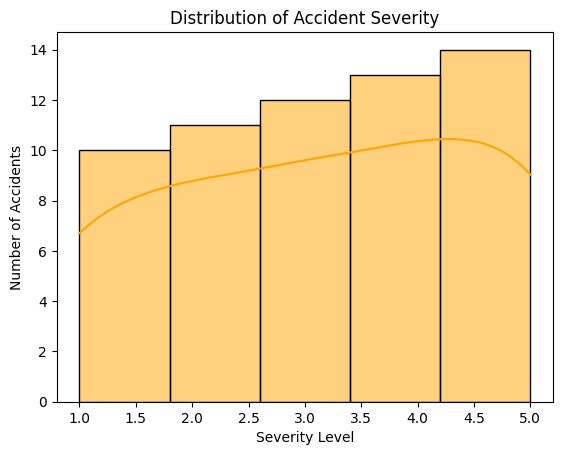

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Severity'], kde=True, bins=5, color='orange')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

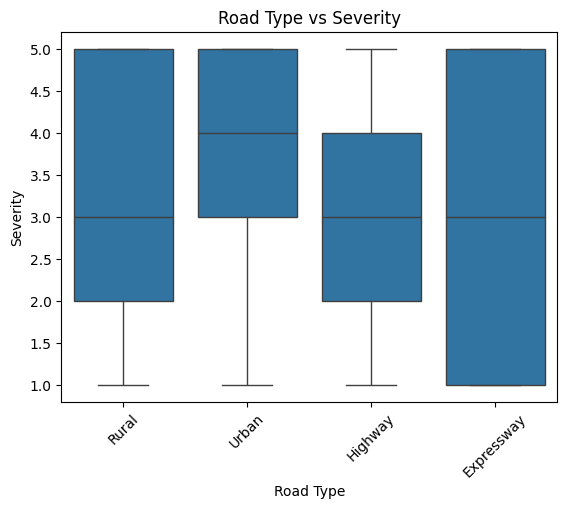

In [ ]:
sns.boxplot(x='Road_Type', y='Severity', data=df)
plt.title('Road Type vs Severity')
plt.xlabel('Road Type')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... your code using sns and plt ...# Load your dataset (if not already loaded)
import pandas as pd
df = pd.read_csv('sample_traffic_accidents.csv')

# Define target column
target = 'Severity'

# Define features by removing the target from column list
features = df.columns.drop(target)

# Print them
print("Target:", target)
print("Features:", features.tolist())

Target: Severity
Features: ['Date', 'Time', 'Location', 'Weather', 'Road_Type', 'Vehicles_Involved', 'Casualties']


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['Date', 'Time', 'Location', 'Weather', 'Road_Type']


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select final features (drop Date and Time or already transformed them)
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)  # Example of Time to Hour
df = df.drop(columns=['Date', 'Time'])  # Drop original Date and Time

# Encode categorical variables (if not done yet)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Weather'] = le.fit_transform(df['Weather'])
df['Road_Type'] = le.fit_transform(df['Road_Type'])

# Define X and y
X = df.drop(columns=['Severity'])  # Features
y = df['Severity']                 # Target

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split scaled features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Check the shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48, 6)
X_test shape: (12, 6)
y_train shape: (48,)
y_test shape: (12,)


In [ ]:
# Train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)


In [ ]:
#evaliate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 2.5196494490886487
R² Score: -0.31459971256799046


In [ ]:
from sklearn.preprocessing import LabelEncoder  # Make sure to import it here

le_location = LabelEncoder().fit(df['Location'])
le_weather = LabelEncoder().fit(df['Weather'])
le_road = LabelEncoder().fit(df['Road_Type'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

# Load your DataFrame
df = pd.read_csv('sample_traffic_accidents.csv')

# Extract 'Hour' from 'Time' and add it to the DataFrame
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Initialize and fit LabelEncoders on the full dataset
le_location = LabelEncoder().fit(df['Location'])
le_weather = LabelEncoder().fit(df['Weather'])
le_road = LabelEncoder().fit(df['Road_Type'])

# Initialize and fit StandardScaler on numerical columns
numerical_cols = ['Vehicles_Involved', 'Casualties', 'Hour']
scaler = StandardScaler().fit(df[numerical_cols])

# ... (rest of your code) ...

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your existing code for data loading and preprocessing) ...

# Initialize

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your DataFrame
df = pd.read_csv('sample_traffic_accidents.csv')

# Convert 'Date' and 'Time' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Extract features from 'Date' and drop original 'Date' column
df['DayofWeek'] = df['Date'].dt.dayofweek  # Example: Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month
df.drop(columns=['Date'], inplace=True)  # Remove original Date column

# Rename 'Time' column to 'Hour'
df.rename(columns={'Time': 'Hour'}, inplace=True)

# Separate features and target
X = df.drop(columns=['Severity'])
y = df['Severity']

# Identify categorical and numeric columns
categorical_cols = ['Location', 'Weather', 'Road_Type']


In [ ]:
# --- Evaluate Model ---
y_pred = model.predict(X_test_scaled)
# Remove squared=False
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculate RMSE manually
print("📉 RMSE:", round(rmse, 2))

📉 RMSE: 1.34


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd

# Define prediction function
def predict_severity(weather, road_type, location, vehicles_involved, casualties, hour):
    # Create input dictionary
    input_data = {
        f'Weather_{weather}': 1,
        f'Road_Type_{road_type}': 1,
        f'Location_{location}': 1,
        'Vehicles_Involved': int(vehicles_involved),
        'Casualties': int(casualties),
        'Hour': int(hour)
    }

    # Create input DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure all required columns exist
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[X.columns]

    # Scale and predict
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    return f"🎓 Predicted Final Grade (G3): {round(prediction[0], 2)}"


In [ ]:
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# --- Load and Prepare Dataset ---
df = pd.read_csv("sample_traffic_accidents.csv")

# Convert time to hour (for model input)
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Features to use
features = ['Weather', 'Road_Type', 'Location', 'Vehicles_Involved', 'Casualties', 'Hour']
target = 'Severity'

# Encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# --- Prediction Function ---
def predict_severity(weather, road_type, location, vehicles, casualties, hour):
    # Create input dictionary
    input_data = {
        f'Weather_{weather}': 1,
        f'Road_Type_{road_type}': 1,
        f'Location_{location}': 1,
        'Vehicles_Involved': int(vehicles),
        'Casualties': int(casualties),
        'Hour': int(hour)
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure all expected columns are present
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[X.columns]

    # Scale and predict
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return f"🎓 Predicted Final Grade (Severity): {round(prediction[0], 2)}"

# --- Gradio UI ---
interface = gr.Interface(
    fn=predict_severity,
    inputs=[
        gr.Dropdown(df['Weather'].unique().tolist(), label="Weather"),
        gr.Dropdown(df['Road_Type'].unique().tolist(), label="Road Type"),
        gr.Dropdown(df['Location'].unique().tolist(), label="Location"),
        gr.Number(label="Vehicles Involved"),
        gr.Number(label="Casualties"),
        gr.Slider(0, 23, step=1, label="Hour of Day")
    ],
    outputs="text",
    title="🚦 Accident Severity Predictor",
    description="Enter traffic conditions to predict the severity of a road accident as a grade (G3-style)"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://78d9c46db81580a6d9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
